# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score, classification_report

# Exploratory Data Analysis

In [2]:
raw_data = pd.read_excel('Dataset 1 Patient 17.xlsx')
raw_data.sample(5)

,Emg1,Emg2,Emg3,Emg4,Emg5,Emg6,Emg7,Emg8,Emg9,Emg10,repetition,rerepetition,stimulus,restimulus
172713,0.4224,1.1719,0.3223,0.2710,0.4492,0.2441,0.8179,1.0449,1.4478,1.0181,4,4,9,9
291401,0.0269,0.0024,0.0024,0.0024,0.0024,0.0024,0.0024,0.0317,0.0024,0.0073,0,0,0,0
445918,0.0024,0.0024,0.0024,0.0024,0.0024,0.0391,0.1025,0.0586,0.0024,0.0146,8,0,21,0
291111,0.0146,0.0024,0.0024,0.0439,0.0024,0.0024,0.1050,0.1733,0.0024,0.1147,9,9,5,5
183222,0.2686,0.0537,0.0024,0.0024,0.0024,0.0024,0.0024,0.1440,0.0024,0.0024,0,0,0,0


In [3]:
raw_data.shape

(473988, 14)

In [4]:
raw_data.columns

Index(['Emg1', 'Emg2', 'Emg3', 'Emg4', 'Emg5', 'Emg6', 'Emg7', 'Emg8', 'Emg9',
       'Emg10', 'repetition', 'rerepetition', 'stimulus', 'restimulus'],
      dtype='object')

In [5]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 473988 entries, 0 to 473987
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Emg1          473988 non-null  float64
 1   Emg2          473988 non-null  float64
 2   Emg3          473988 non-null  float64
 3   Emg4          473988 non-null  float64
 4   Emg5          473988 non-null  float64
 5   Emg6          473988 non-null  float64
 6   Emg7          473988 non-null  float64
 7   Emg8          473988 non-null  float64
 8   Emg9          473988 non-null  float64
 9   Emg10         473988 non-null  float64
 10  repetition    473988 non-null  int64  
 11  rerepetition  473988 non-null  int64  
 12  stimulus      473988 non-null  int64  
 13  restimulus    473988 non-null  int64  
dtypes: float64(10), int64(4)
memory usage: 50.6 MB


In [6]:
raw_data.describe(include='all')

,Emg1,Emg2,Emg3,Emg4,Emg5,Emg6,Emg7,Emg8,Emg9,Emg10,repetition,rerepetition,stimulus,restimulus
count,473988.000000,473988.000000,473988.000000,473988.000000,473988.000000,473988.000000,473988.000000,473988.000000,473988.000000,473988.000000,473988.000000,473988.000000,473988.000000,473988.000000
mean,0.237301,0.176670,0.174632,0.053067,0.016055,0.038061,0.259480,0.299283,0.189452,0.211255,3.135710,2.152799,5.556793,4.003823
std,0.385633,0.397342,0.506173,0.206251,0.073030,0.115458,0.551616,0.466489,0.547019,0.427989,3.481578,3.222700,6.570595,6.269613
min,0.000000,0.000000,0.002400,0.000000,0.002400,0.000000,0.002400,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.024400,0.002400,0.002400,0.002400,0.002400,0.002400,0.002400,0.046400,0.002400,0.002400,0.000000,0.000000,0.000000,0.000000
50%,0.114700,0.002400,0.002400,0.002400,0.002400,0.002400,0.061000,0.134300,0.002400,0.036600,2.000000,0.000000,3.000000,0.000000
75%,0.297900,0.127000,0.075700,0.002400,0.002400,0.022000,0.261200,0.341800,0.070800,0.227100,6.000000,4.000000,10.000000,7.000000
max,4.660600,4.660600,4.658200,4.658200,3.474100,2.683100,4.660600,4.663100,4.660600,4.658200,10.000000,10.000000,23.000000,23.000000


In [7]:
print("Unique Dependent values and their counts :")
print(raw_data["stimulus"].value_counts())

Unique Dependent values and their counts :
0     203806
4      15675
8      15627
7      15627
6      15619
5      15610
12     15602
2      15591
11     15575
9      15571
3      15546
10     15539
1      15500
14     10419
13     10416
17     10410
15     10370
16     10335
21      5221
18      5214
19      5206
23      5175
20      5174
22      5160
Name: stimulus, dtype: int64


Text(0, 0.5, 'Frequency')

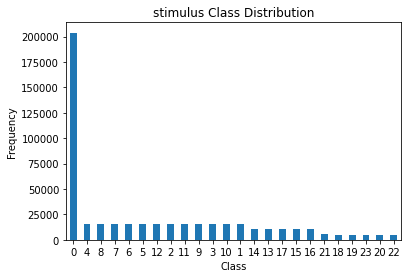

In [8]:
count_classes = pd.value_counts(raw_data['stimulus'], sort = True)

count_classes.plot(kind = 'bar', rot=0)

plt.title("stimulus Class Distribution")

plt.xlabel("Class")

plt.ylabel("Frequency")

# Data Cleaning and Exploratory Data Analysis with New Data

In [9]:
index_names = raw_data[ (raw_data['stimulus'] != raw_data['restimulus'])].index
raw_data.drop(index_names, inplace = True)

In [10]:
index_names = raw_data[ (raw_data['repetition'] != raw_data['rerepetition'])].index
raw_data.drop(index_names, inplace = True)

In [11]:
raw_data.sample(5)

,Emg1,Emg2,Emg3,Emg4,Emg5,Emg6,Emg7,Emg8,Emg9,Emg10,repetition,rerepetition,stimulus,restimulus
301650,0.2612,0.6274,0.0513,0.0024,0.0024,0.0586,0.2930,0.5005,0.2759,0.1929,10,10,6,6
166504,0.0439,0.0244,0.0024,0.0024,0.0024,0.0024,0.0024,0.0293,0.0024,0.0024,0,0,0,0
208233,0.4736,1.0522,2.0557,2.0459,0.2417,0.0708,0.1563,0.4761,2.0898,0.1001,6,6,13,13
164178,0.0806,0.5859,0.1001,0.0049,0.0024,0.0171,0.4883,0.3223,0.5957,0.6079,4,4,8,8
14908,0.2466,0.7202,0.3125,0.0024,0.0024,0.0342,0.8789,0.3882,0.6519,1.1084,8,8,2,2


In [12]:
raw_data.shape

(387904, 14)

In [13]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 387904 entries, 0 to 473987
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Emg1          387904 non-null  float64
 1   Emg2          387904 non-null  float64
 2   Emg3          387904 non-null  float64
 3   Emg4          387904 non-null  float64
 4   Emg5          387904 non-null  float64
 5   Emg6          387904 non-null  float64
 6   Emg7          387904 non-null  float64
 7   Emg8          387904 non-null  float64
 8   Emg9          387904 non-null  float64
 9   Emg10         387904 non-null  float64
 10  repetition    387904 non-null  int64  
 11  rerepetition  387904 non-null  int64  
 12  stimulus      387904 non-null  int64  
 13  restimulus    387904 non-null  int64  
dtypes: float64(10), int64(4)
memory usage: 44.4 MB


In [14]:
print(raw_data.isnull().any())

Emg1            False
Emg2            False
Emg3            False
Emg4            False
Emg5            False
Emg6            False
Emg7            False
Emg8            False
Emg9            False
Emg10           False
repetition      False
rerepetition    False
stimulus        False
restimulus      False
dtype: bool


In [15]:
X = raw_data.iloc[:,0:10]
y = raw_data.stimulus

# Scalling Data

In [16]:
from sklearn.preprocessing import StandardScaler

In [17]:
X = StandardScaler().fit_transform(X)

# Indipendent Component Analysis (ICA)

https://www.nmr.mgh.harvard.edu/mne/0.14/manual/preprocessing/ica.html

In [18]:
from sklearn.decomposition import FastICA

ica = FastICA(n_components=10)
X_ica = ica.fit_transform(X)

In [19]:
# Splitting data for training and testing
X_train, X_test, y_train, y_test = train_test_split(X_ica, y, test_size = 0.2, random_state = 39)

# Machine Learning Models

In [20]:
from sklearn import tree
tree = tree.DecisionTreeClassifier()
tree.fit(X_train, y_train)

DecisionTreeClassifier()

In [21]:
y_pred1 = tree.predict(X_test)

In [22]:
from sklearn.metrics import accuracy_score
accuracy = {accuracy_score(y_test, y_pred1)}
print(f"Accuracy is: {accuracy_score(y_test, y_pred1)* 100}")

Accuracy is: 84.02959487503384


Classification report : 
               precision    recall  f1-score   support

           0       0.94      0.94      0.94     40602
           1       0.77      0.76      0.76      1971
           2       0.76      0.75      0.75      1947
           3       0.70      0.72      0.71      2180
           4       0.76      0.76      0.76      2106
           5       0.73      0.75      0.74      1946
           6       0.79      0.80      0.79      1892
           7       0.72      0.71      0.71      1942
           8       0.74      0.73      0.74      2024
           9       0.73      0.70      0.72      2113
          10       0.73      0.72      0.73      1882
          11       0.73      0.75      0.74      2151
          12       0.71      0.70      0.70      2177
          13       0.71      0.66      0.68      1454
          14       0.66      0.67      0.66      1529
          15       0.69      0.71      0.70      1481
          16       0.67      0.69      0.68      1555
 

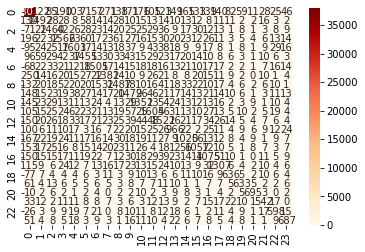

In [23]:
print('\033[1m' +'Classification report : '+ '\033[0m\n', classification_report(y_test, y_pred1))

cm = confusion_matrix(y_pred1, y_test)
print('\033[1m' +'Confusion Matrix : '+ '\033[0m')
sns.heatmap(cm, cmap = 'OrRd',annot = True, fmt='d')
plt.show()

# Evaluation -- Decision Tree

In [24]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test,y_pred1))
print('MSE:', metrics.mean_squared_error(y_test, y_pred1))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred1)))

MAE: 1.2855338291592013
MSE: 15.094636573387813
RMSE: 3.8851816654292772


In [25]:
from sklearn.metrics import precision_score
print("Precision Score : ",precision_score(y_test, y_pred1, average='weighted'))


from sklearn.metrics import recall_score
print("Recall Score : ",recall_score(y_test, y_pred1,average='weighted'))


from sklearn.metrics import f1_score
print("f1_score : ",f1_score(y_test, y_pred1,average='weighted'))

Precision Score :  0.8402280721633179
Recall Score :  0.8402959487503383
f1_score :  0.8402083784836415


# KNeighborsClassifier

In [26]:
from sklearn.neighbors import KNeighborsClassifier
KNeighborsClassifier = KNeighborsClassifier()
KNeighborsClassifier.fit(X_train, y_train)

KNeighborsClassifier()

In [27]:
y_pred2 = KNeighborsClassifier.predict(X_test)

In [28]:
from sklearn.metrics import accuracy_score
accuracy = {accuracy_score(y_test, y_pred2)}
print(f"Accuracy is: {accuracy_score(y_test, y_pred2)* 100}")

Accuracy is: 91.71188822005388


Classification report : 
               precision    recall  f1-score   support

           0       0.93      0.99      0.96     40602
           1       0.89      0.88      0.89      1971
           2       0.89      0.88      0.88      1947
           3       0.90      0.84      0.87      2180
           4       0.92      0.90      0.91      2106
           5       0.91      0.88      0.89      1946
           6       0.92      0.90      0.91      1892
           7       0.90      0.78      0.83      1942
           8       0.88      0.85      0.86      2024
           9       0.91      0.81      0.86      2113
          10       0.91      0.82      0.86      1882
          11       0.94      0.84      0.89      2151
          12       0.90      0.82      0.86      2177
          13       0.88      0.80      0.84      1454
          14       0.85      0.76      0.81      1529
          15       0.88      0.79      0.83      1481
          16       0.89      0.80      0.84      1555
 

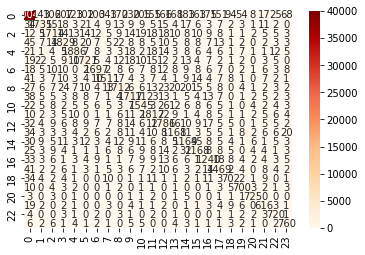

In [29]:
print('\033[1m' +'Classification report : '+ '\033[0m\n', classification_report(y_test, y_pred2))

cm = confusion_matrix(y_pred2, y_test)
print('\033[1m' +'Confusion Matrix : '+ '\033[0m')
sns.heatmap(cm, cmap = 'OrRd',annot = True, fmt='d')
plt.show()

# Evaluation -- KNeighborsClassifier

In [30]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test,y_pred2))
print('MSE:', metrics.mean_squared_error(y_test, y_pred2))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred2)))

MAE: 0.7135767778193114
MSE: 8.646575836867274
RMSE: 2.940506051152977


In [31]:
from sklearn.metrics import precision_score
print("Precision Score : ",precision_score(y_test, y_pred2, average='weighted'))


from sklearn.metrics import recall_score
print("Recall Score : ",recall_score(y_test, y_pred2,average='weighted'))


from sklearn.metrics import f1_score
print("f1_score : ",f1_score(y_test, y_pred2,average='weighted'))

Precision Score :  0.9163701420726874
Recall Score :  0.9171188822005388
f1_score :  0.9155500047639038


# ExtraTreesClassifier

In [32]:
from sklearn.ensemble import ExtraTreesClassifier
extratree = ExtraTreesClassifier()
extratree.fit(X_train, y_train)

ExtraTreesClassifier()

In [33]:
y_pred5 = extratree.predict(X_test)

In [34]:
from sklearn.metrics import accuracy_score
accuracy = {accuracy_score(y_test, y_pred5)}
print(f"Accuracy is: {accuracy_score(y_test, y_pred5)* 100}")

Accuracy is: 94.02688802670757


Classification report : 
               precision    recall  f1-score   support

           0       0.93      0.99      0.96     40602
           1       0.96      0.91      0.93      1971
           2       0.94      0.92      0.93      1947
           3       0.95      0.87      0.91      2180
           4       0.98      0.92      0.95      2106
           5       0.97      0.92      0.95      1946
           6       0.97      0.91      0.94      1892
           7       0.93      0.80      0.86      1942
           8       0.92      0.89      0.90      2024
           9       0.96      0.86      0.90      2113
          10       0.95      0.85      0.90      1882
          11       0.97      0.89      0.93      2151
          12       0.94      0.88      0.91      2177
          13       0.94      0.85      0.89      1454
          14       0.90      0.83      0.86      1529
          15       0.90      0.85      0.88      1481
          16       0.95      0.85      0.90      1555
 

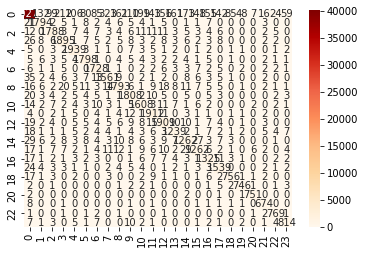

In [35]:
print('\033[1m' +'Classification report : '+ '\033[0m\n', classification_report(y_test, y_pred5))

cm = confusion_matrix(y_pred5, y_test)
print('\033[1m' +'Confusion Matrix : '+ '\033[0m')
sns.heatmap(cm, cmap = 'OrRd',annot = True, fmt='d')
plt.show()

# Evaluation -- ExtraTreesClassifier

In [36]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test,y_pred5))
print('MSE:', metrics.mean_squared_error(y_test, y_pred5))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred5)))

MAE: 0.5344220878823424
MSE: 6.589641793738157
RMSE: 2.567029760976323


In [37]:
from sklearn.metrics import precision_score
print("Precision Score : ",precision_score(y_test, y_pred5, average='weighted'))


from sklearn.metrics import recall_score
print("Recall Score : ",recall_score(y_test, y_pred5,average='weighted'))


from sklearn.metrics import f1_score
print("f1_score : ",f1_score(y_test, y_pred5,average='weighted'))

Precision Score :  0.9408217887336584
Recall Score :  0.9402688802670757
f1_score :  0.9393820433988699


# Random Forest

In [38]:
from sklearn.ensemble import RandomForestClassifier
RandomForestClassifier = RandomForestClassifier()
RandomForestClassifier.fit(X_train, y_train)

RandomForestClassifier()

In [39]:
y_pred3 = RandomForestClassifier.predict(X_test)

In [40]:
from sklearn.metrics import accuracy_score
accuracy = {accuracy_score(y_test, y_pred3)}
print(f"Accuracy is: {accuracy_score(y_test, y_pred3)* 100}")

Accuracy is: 93.28314922468131


Classification report : 
               precision    recall  f1-score   support

           0       0.93      0.99      0.96     40602
           1       0.95      0.89      0.92      1971
           2       0.93      0.91      0.92      1947
           3       0.93      0.85      0.89      2180
           4       0.97      0.91      0.94      2106
           5       0.95      0.90      0.93      1946
           6       0.96      0.91      0.93      1892
           7       0.92      0.80      0.86      1942
           8       0.90      0.88      0.89      2024
           9       0.94      0.84      0.89      2113
          10       0.94      0.84      0.89      1882
          11       0.96      0.88      0.92      2151
          12       0.93      0.87      0.90      2177
          13       0.93      0.83      0.87      1454
          14       0.88      0.79      0.83      1529
          15       0.87      0.84      0.86      1481
          16       0.92      0.84      0.88      1555
 

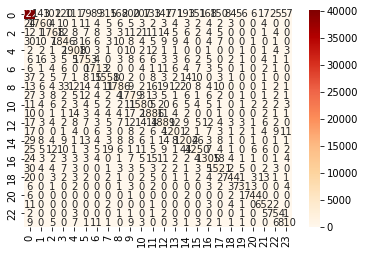

In [41]:
print('\033[1m' +'Classification report : '+ '\033[0m\n', classification_report(y_test, y_pred3))

cm = confusion_matrix(y_pred3, y_test)
print('\033[1m' +'Confusion Matrix : '+ '\033[0m')
sns.heatmap(cm, cmap = 'OrRd',annot = True, fmt='d')
plt.show()

# Evaluation -- Random Forest

In [42]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test,y_pred3))
print('MSE:', metrics.mean_squared_error(y_test, y_pred3))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred3)))

MAE: 0.5858264265735167
MSE: 7.174991299416094
RMSE: 2.678617423115159


In [43]:
from sklearn.metrics import precision_score
print("Precision Score : ",precision_score(y_test, y_pred3, average='weighted'))


from sklearn.metrics import recall_score
print("Recall Score : ",recall_score(y_test, y_pred3,average='weighted'))


from sklearn.metrics import f1_score
print("f1_score : ",f1_score(y_test, y_pred3,average='weighted'))

Precision Score :  0.9329981057746949
Recall Score :  0.932831492246813
f1_score :  0.9317242381428109


# XGBoost

In [44]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_train, y_train)

E:\MachineLearning\envs\gpu\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
E:\MachineLearning\envs\gpu\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:21:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=12,
              num_parallel_tree=1, objective='multi:softprob', predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=None,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [45]:
y_pred4 = xgb.predict(X_test)

In [46]:
from sklearn.metrics import accuracy_score
accuracy = {accuracy_score(y_test, y_pred4)}
print(f"Accuracy is: {accuracy_score(y_test, y_pred4)* 100}")

Accuracy is: 86.77253451231616


Classification report : 
               precision    recall  f1-score   support

           0       0.90      0.98      0.94     40602
           1       0.86      0.79      0.82      1971
           2       0.79      0.78      0.79      1947
           3       0.83      0.73      0.77      2180
           4       0.88      0.77      0.82      2106
           5       0.85      0.74      0.79      1946
           6       0.88      0.79      0.84      1892
           7       0.86      0.72      0.78      1942
           8       0.79      0.78      0.79      2024
           9       0.81      0.68      0.74      2113
          10       0.83      0.73      0.77      1882
          11       0.85      0.73      0.79      2151
          12       0.76      0.68      0.72      2177
          13       0.80      0.64      0.71      1454
          14       0.74      0.67      0.71      1529
          15       0.74      0.75      0.75      1481
          16       0.79      0.67      0.72      1555
 

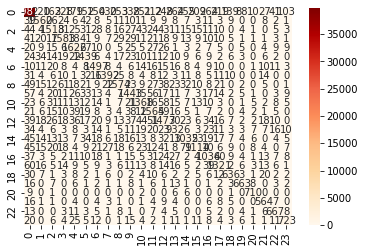

In [47]:
print('\033[1m' +'Classification report : '+ '\033[0m\n', classification_report(y_test, y_pred4))

cm = confusion_matrix(y_pred4, y_test)
print('\033[1m' +'Confusion Matrix : '+ '\033[0m')
sns.heatmap(cm, cmap = 'OrRd',annot = True, fmt='d')
plt.show()

# Evaluation -- XGBoost

In [48]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test,y_pred4))
print('MSE:', metrics.mean_squared_error(y_test, y_pred4))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred4)))

MAE: 1.0803418362743455
MSE: 12.846057668759103
RMSE: 3.584139739011176


In [49]:
from sklearn.metrics import precision_score
print("Precision Score : ",precision_score(y_test, y_pred4, average='weighted'))


from sklearn.metrics import recall_score
print("Recall Score : ",recall_score(y_test, y_pred4,average='weighted'))


from sklearn.metrics import f1_score
print("f1_score : ",f1_score(y_test, y_pred4,average='weighted'))

Precision Score :  0.8645815851350523
Recall Score :  0.8677253451231616
f1_score :  0.8637363497060471
